<div style="font-size:40px; color:#0F2080;">
  Importing <span style="color:#F5793A;">libraries</span> and <span style="color:#F5793A;">fits</span>
</div>

In [4]:
import os
import numpy as np
from astropy.io import fits
import matplotlib.pyplot as plt
from pathlib import Path
import glob
import pahfit
from numpy.polynomial import Polynomial
from astropy.io.misc import yaml
from pkg_resources import resource_filename
from pahfit.errors import PAHFITPackError, PAHFITWarning
from warnings import warn
from astropy import units as u
#from pahfit.model import Model
from pahfit.modelj import Model
from specutils import Spectrum1D
import astropy.units as u
from astropy.nddata import StdDevUncertainty

fits_dir = '/Users/Juan/Downloads/Research/JWSTPAH'
fits_files = [f for f in os.listdir(fits_dir) if f.endswith('.fits')]

print(f"Found {len(fits_files)} FITS files:")
for file in fits_files:
    print(file)

Found 17 FITS files:
CH1_ring1.fits
CH1_ring2.fits
CH1_ring3.fits
CH1_ring4.fits
CH1_ring5.fits
CH1_ring6.fits
CH1_ring7.fits
jw01328-c1006_t014_miri_ch1-shortmediumlong_s3d.fits
jw01328-c1006_t014_miri_ch1-shortmediumlong_x1d.fits
jw01328-c1006_t014_miri_ch2-shortmediumlong_s3d.fits
jw01328-c1006_t014_miri_ch2-shortmediumlong_x1d.fits
jw01328-c1006_t014_miri_ch3-shortmediumlong_s3d.fits
jw01328-c1006_t014_miri_ch3-shortmediumlong_x1d.fits
jw01328-c1006_t014_miri_ch4-shortmediumlong_s3d.fits
jw01328-c1006_t014_miri_ch4-shortmediumlong_x1d.fits
NGC7469_PAHs.fits
NGC7469__stitched.fits


<div style="font-size:40px; color:#0F2080;">
  Running <span style="color:#F5793A;">PAHfit</span> 
</div>

C:\Users\Juan\anaconda3\lib\site-packages\numpy\ma\core.py:1163: RuntimeWarning: overflow encountered in divide
  result = self.f(da, db, *args, **kwargs)


Both actual and predicted relative reductions in the sum of squares
  are at most 0.000000
Fitting completed and results saved to: NGC7469_PAHs.ecsv


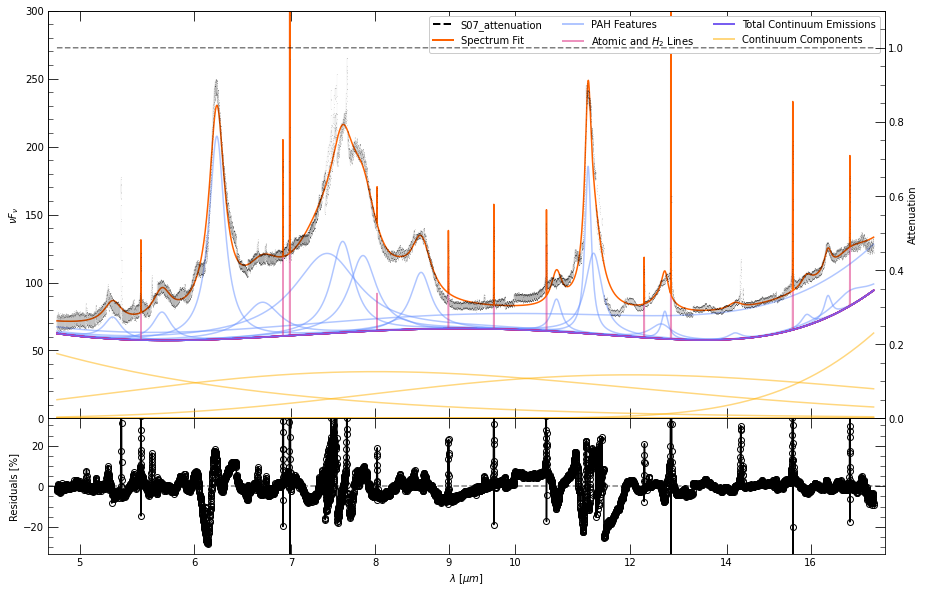

In [7]:
spec = Spectrum1D.read('NGC7469__stitched.fits')
spec.meta['instrument'] = 'jwst.miri.*.*'
spec.set_redshift_to(0.016268)

model = Model.from_yaml('classic.yaml')
model.guess(spec)
model.fit(spec)
model.plot(spec)

output_file = 'NGC7469_PAHs.ecsv'
model.save(output_file, overwrite=True)
print("Fitting completed and results saved to:", output_file)